# LLaVA

LLaVAは画像のエンコーダーとLLMのLlama2を合わた新しいend-to-endの学習済みモデルで，GPT4-Vのオープンソースのようなモデルです．ScienceQAというデータセットでSOTAも達成しています．

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/develop/multimodal/image_to_text/llava.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://github.com/haotian-liu/LLaVA

In [2]:
!git clone https://github.com/haotian-liu/LLaVA.git

Cloning into 'LLaVA'...
remote: Enumerating objects: 1323, done.
remote: Counting objects: 100% (476/476), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 1323 (delta 386), reused 330 (delta 310), pack-reused 847
Receiving objects: 100% (1323/1323), 12.24 MiB | 8.23 MiB/s, done.
Resolving deltas: 100% (825/825), done.


In [3]:
cd LLaVA

/content/LLaVA


In [ ]:
%%capture
!pip install -e .

In [9]:
from PIL import Image
import requests

### 画像を取得

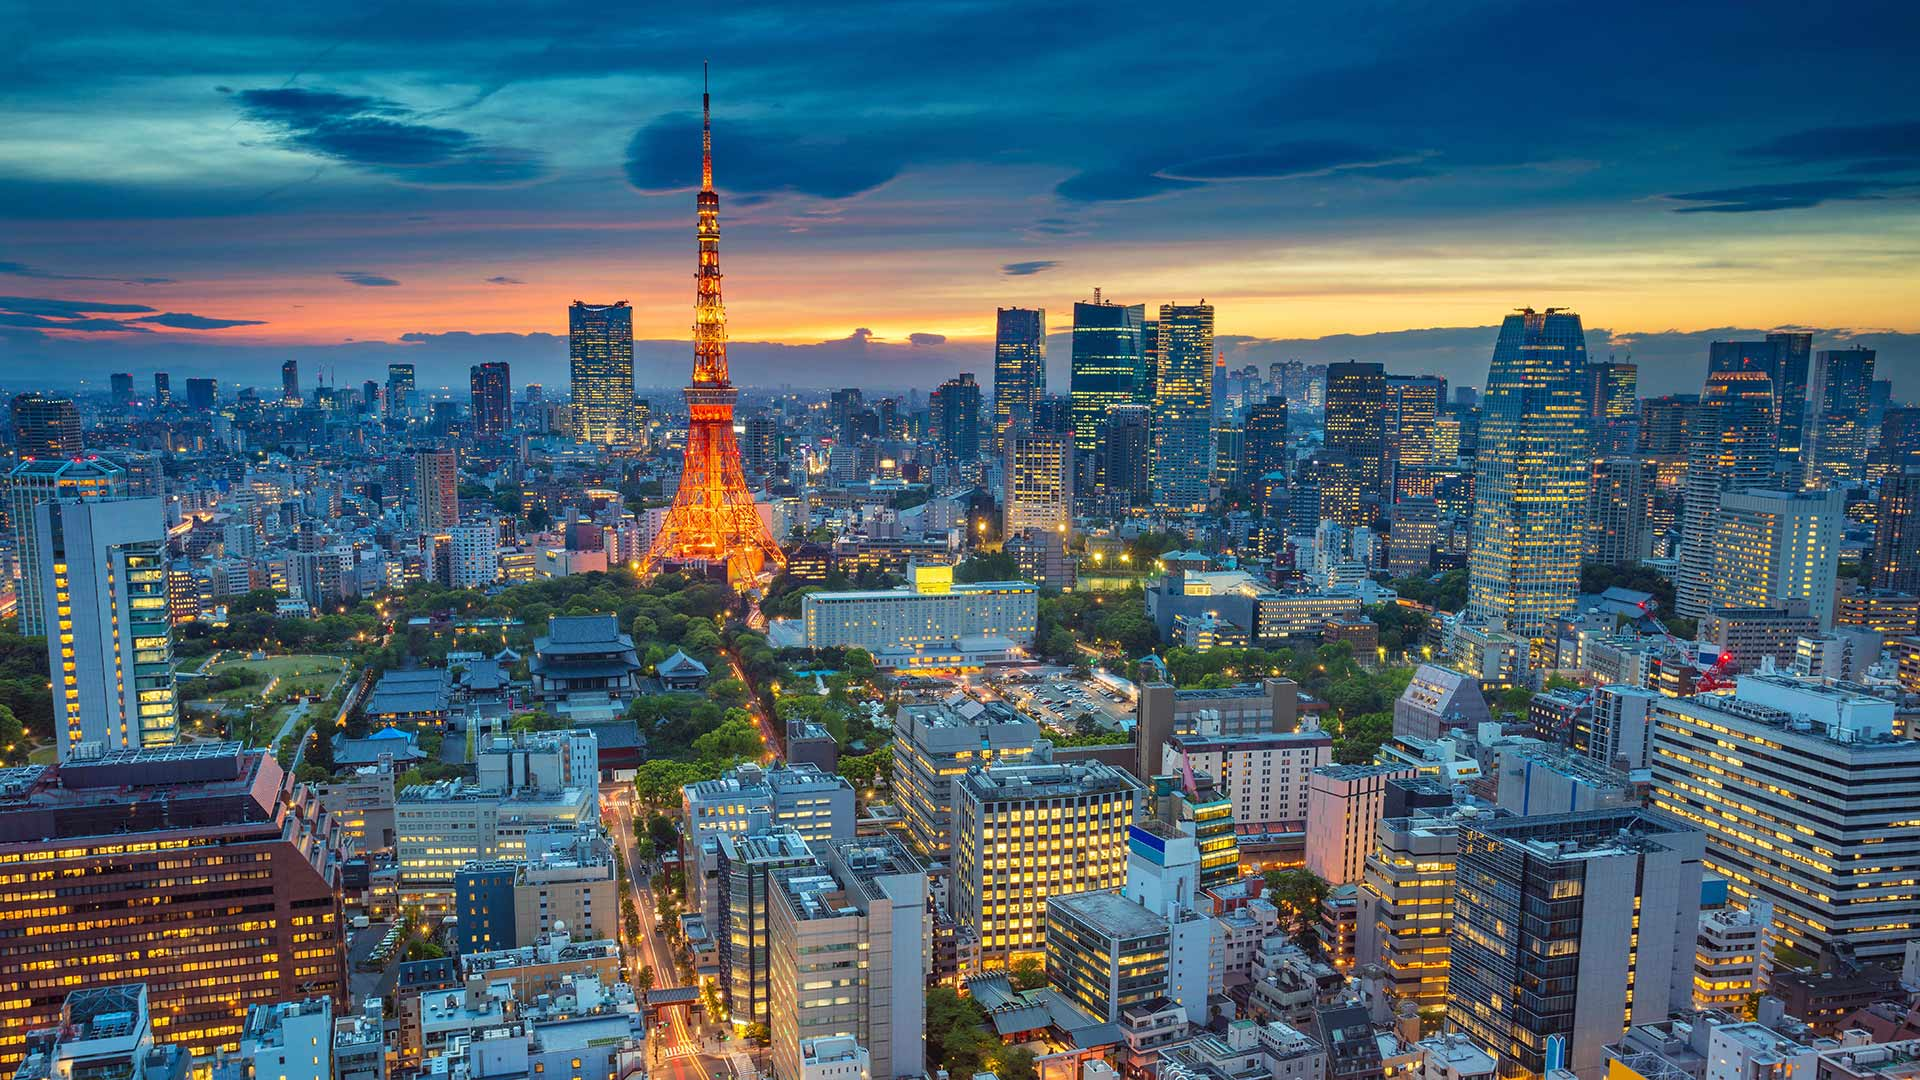

In [11]:
url = "https://img.peapix.com/e27fcf12e0664a5cb1c6b58c6b311d31.jpg?attachment&modal"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image.save("/content/tokyo.jpg", "JPEG")
image

In [ ]:
!python -m llava.serve.cli \
    --model-path liuhaotian/llava-v1.5-13b \
    --image-file "/content/tokyo.jpg" \
    --load-4bit

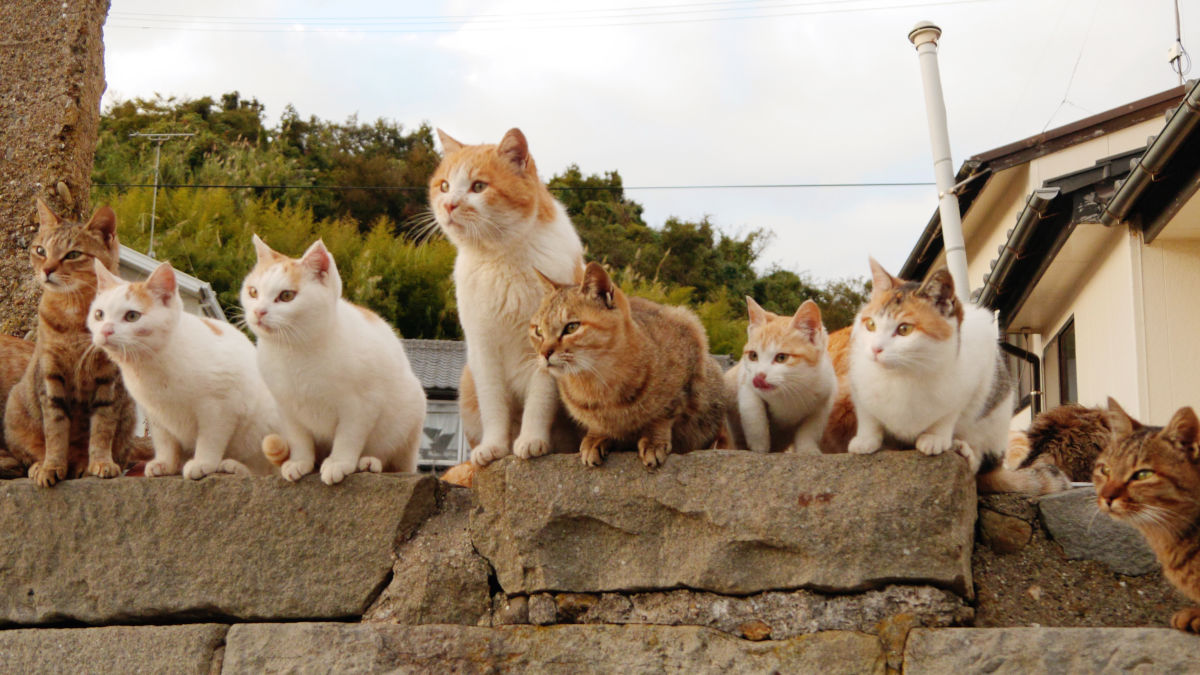

In [15]:
url = "https://i.gzn.jp/img/2013/12/08/cat-island-aoshima/P1640392.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image.save("/content/cat.jpg", "JPEG")
image

In [16]:
!python -m llava.serve.cli \
    --model-path liuhaotian/llava-v1.5-13b \
    --image-file "/content/cat.jpg" \
    --load-4bit

[2023-10-10 19:28:53,684] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2023-10-10 19:28:55.559980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading checkpoint shards: 100% 3/3 [00:22<00:00,  7.40s/it]
USER: なんの画像ですか?
ASSISTANT: この画像は、7匹の猫が一緒に立っているところを描いたものです。
USER: 猫はどこを向いていますか?
ASSISTANT: 猫は、同じ方向を向いています。
USER: 一番子供の猫は左から何番目だと思いますか？
ASSISTANT: 一番子供の猫は、左から4番目です。
USER: 左から順番に猫の色を教えてください．
ASSISTANT: 左から順番に、猫の色は以下の通りです。

1. 白
2. 白と淡い黄色の混合
3. 淡い黄色
4. 淡い黄色と白の混合
5. 淡い黄色と白の混合
6. 淡い黄色と白の混合
7. 淡い黄色と白の混合

これらの猫は、同じ方向を向いています。
USER: 
^C
